In [8]:
import cv2
import numpy as np

In [9]:
img=cv2.imread('u.jpg')

In [10]:
import matplotlib.pyplot as plt

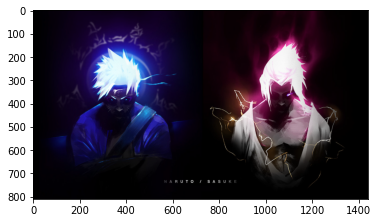

In [11]:
plt.imshow(img)

In [12]:
newImg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

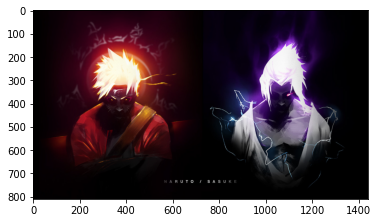

In [13]:
plt.imshow(newImg)

In [14]:



cap=cv2.VideoCapture(0)
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
skip=0
face_data=[]
dataset_path='./Data/'
file_name=input("Enter the name of the person :")
while(True):
    ret,frame=cap.read()
    
    if ret==False:
        continue
    gray_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) 
    faces=face_cascade.detectMultiScale(frame,1.3,5)
    faces=sorted(faces,key=lambda f:f[2]*f[3])
    for face in faces[-1:]:
        x,y,w,h=face
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2 )
        offset=10
        face_section=frame[y-offset:y+h+offset,x-offset:x+w+offset]
        face_section=cv2.resize(face_section,(100,100))
        skip+=1
        if skip%10==0:
            face_data.append(face_section)
            print(len(face_data))
    cv2.imshow('Video Frame',frame)
    cv2.imshow("Face_selection",face_section)
    key_pressed=cv2.waitKey(1) & 0xFF
    if key_pressed==ord('f'):
        break
face_data=np.asarray(face_data)
face_data=face_data.reshape((face_data.shape[0],-1))
print(face_data.shape)
np.save(dataset_path+file_name+'.npy',face_data)
print("Data Saved ")
cap.release()
cv2.destroyAllWindows()


Enter the name of the person :Anjali
1
2
3
4
5
6
7
8
9
10
11
12
13
(13, 30000)
Data Saved 
